## PROJECT: Visualization and Forecasting of Stocks 

The Stock Exchange or Wall Street traders regularly research, evaluate, and follow the stock values of various firms' shares. These charts make it simpler for traders to visualise the behaviour of equities and forecast trends. But what if we could use these statistics to forecast the future stock price for a certain date?
In this project, we will be creating a single-page web application using Dash (a Python framework) and some Machine Learning models which will show company information (logo, registered name, and description), and some stock plots based on the stock code given by the user. Also the ML model will enable the user to get predicted stock prices for the date inputted by the user. Wrapping it, we will be deploying our app using Heroku.

In [1]:
import pandas as pd
import datetime
def get_historical_data(symbol,start_date,end_date):
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv('google.csv', header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    return df

In [2]:
data = get_historical_data('GOOGL','2005-01-01','2017-06-30')

In [3]:
data.to_csv('google.csv',index = False)

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('google.csv')
print(data.head())
print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

        Date    Open    High     Low   Close   Volume
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912


Open   --- mean : 382.51416852146264   	 Std:  213.48651683323436   	 Max:  1005.49   	 Min:  87.74
High   --- mean : 385.8720985691574   	 Std:  214.60229511464593   	 Max:  1008.61   	 Min:  89.29
Low    --- mean : 378.7371255961844   	 Std:  212.08010983015188   	 Max:  996.62   	 Min:  86.37
Close  --- mean : 382.3502480127186   	 Std:  213.43595872312451   	 Max:  1004.28   	 Min:  87.58
Volume --- mean : 4205707.889666136   	 Std:  3877483.007730211   	 Max:  41182889   	 Min:  521141


In [5]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)
print(stocks.head())
print("----------------------------------------------")
print(stocks.tail())

   Item    Open   Close    Volume
0     0   98.80  101.46  15860692
1     1  100.77   97.35  13762396
2     2   96.82   96.85   8239545
3     3   97.72   94.37  10389803
4     4   95.42   97.02   9666175
----------------------------------------------
      Item    Open   Close   Volume
3140  3140  990.00  972.09  1517912
3141  3141  961.60  948.09  2443602
3142  3142  950.66  961.01  2745568
3143  3143  951.35  937.82  3206674
3144  3144  943.99  929.68  2287662


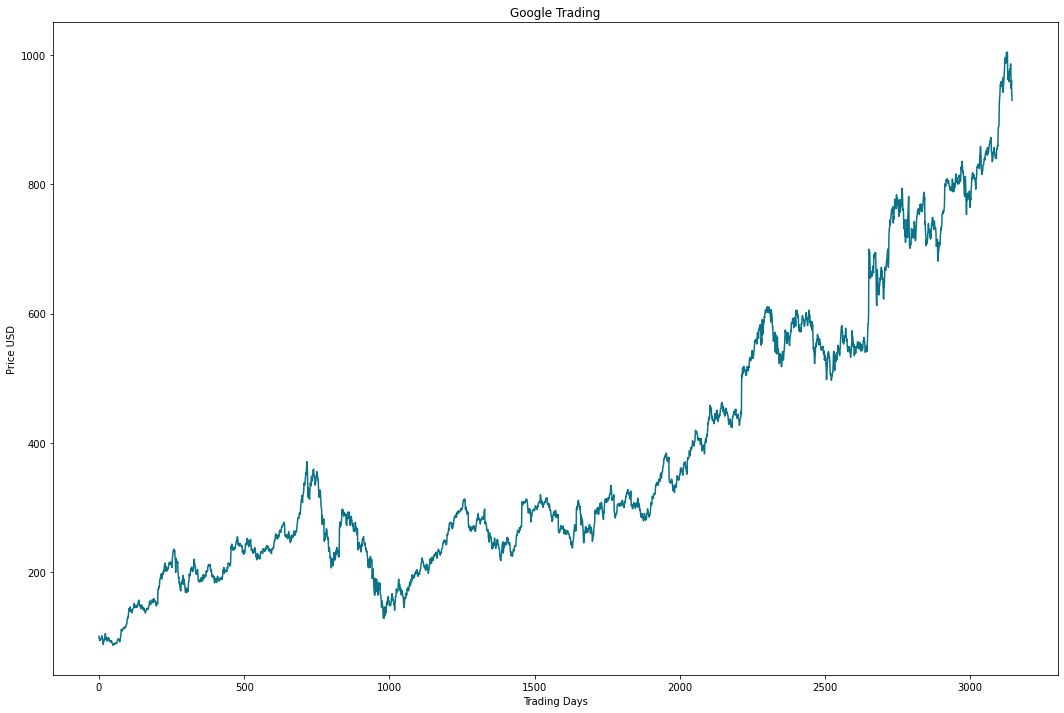

In [6]:
import visualize
visualize.plot_basic(stocks)

In [7]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())
print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.012051  0.015141  0.377248
1     1  0.014198  0.010658  0.325644
2     2  0.009894  0.010112  0.189820
3     3  0.010874  0.007407  0.242701
4     4  0.008368  0.010298  0.224905


Open   --- mean : 0.32119222938868175   	 Std:  0.23261946808306658   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.3215558503465895   	 Std:  0.2328307611248222   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.09061506381049178   	 Std:  0.09535947661989866   	 Max:  0.9999999999999999   	 Min:  0.0


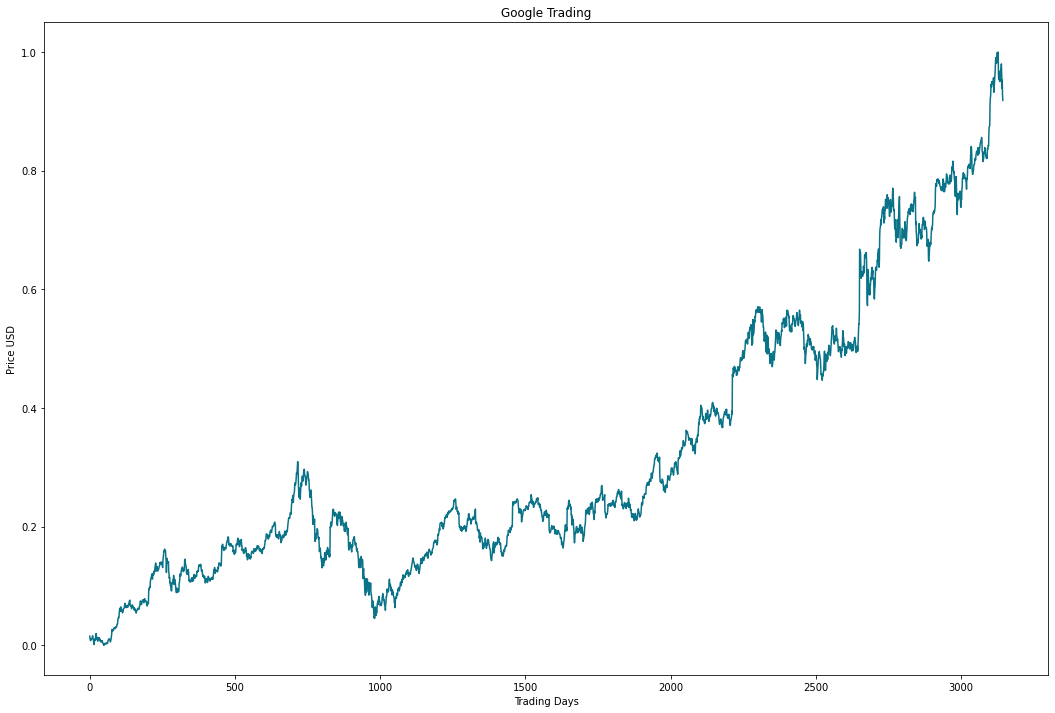

In [8]:
visualize.plot_basic(stocks)

In [9]:
stocks.to_csv('google_preprocessed.csv',index= False)

In [10]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import visualize as vs
import stock_data as sd
import LinearRegressionModel
stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.012051,0.015141,0.377248
1,1,0.014198,0.010658,0.325644
2,2,0.009894,0.010112,0.189820
3,3,0.010874,0.007407,0.242701
4,4,0.008368,0.010298,0.224905


In [11]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


In [12]:
model = LinearRegressionModel.build_model(X_train,y_train)

In [13]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

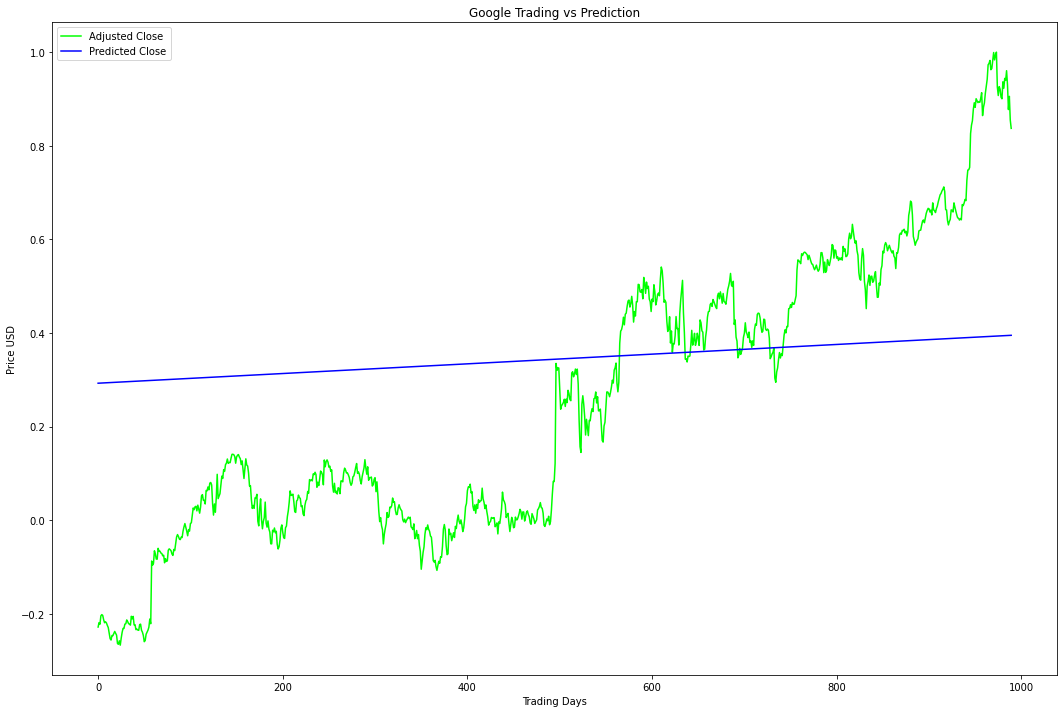

In [14]:
vs.plot_prediction(y_test,predictions)

In [15]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)
Test Score: 0.08133781 MSE (0.28519784 RMSE)


In [16]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
import lstm, time 
import visualize as vs
import stock_data as sd
import LinearRegressionModel
stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)
display(stocks_data.head())

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


In [17]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):  
    test_data_cut = test_data_size + unroll_length + 1
    x_train = stocks[0:-prediction_time - test_data_cut].values
    y_train = stocks[prediction_time:-test_data_cut]['Close'].values
    x_test = stocks[0 - test_data_cut:-prediction_time].values
    y_test = stocks[prediction_time - test_data_cut:]['Close'].values
    return x_train, x_test, y_train, y_test
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)
unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


In [18]:
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.003989458084106445


In [19]:
model.fit(X_train,y_train,epochs=1,validation_split=0.05)

77/77 [==============================] - 13s 107ms/step - loss: 0.0036 - val_loss: 3.0068e-04


In [20]:
predictions = model.predict(X_test)

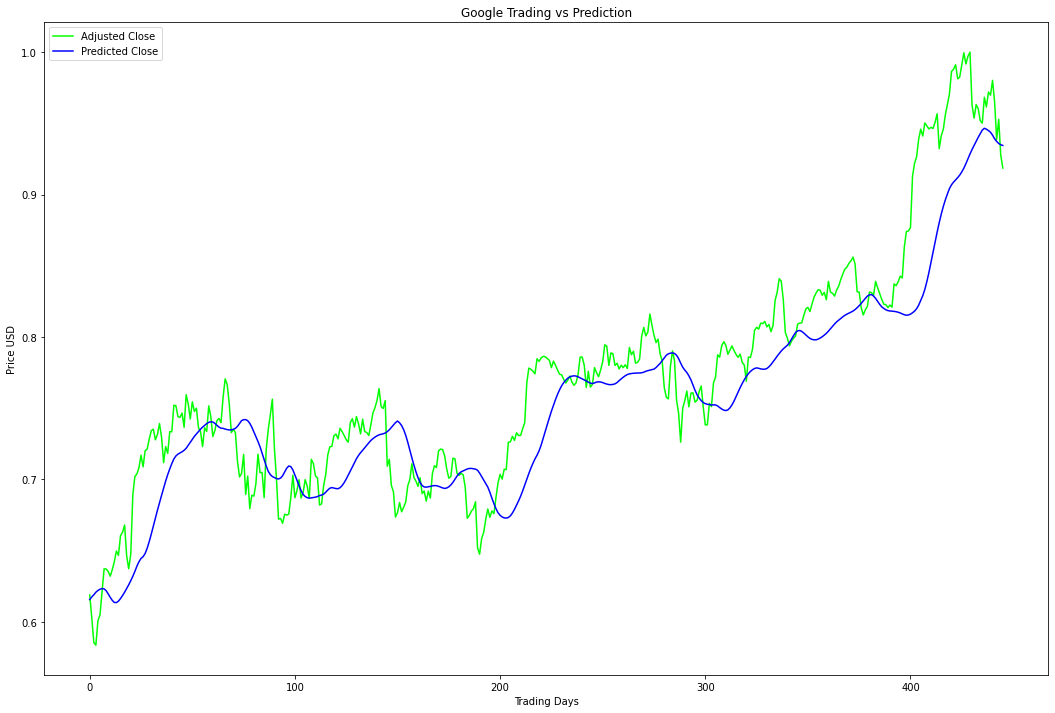

In [21]:
vs.plot_lstm_prediction(y_test,predictions)

In [22]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00039396 MSE (0.01984837 RMSE)
Test Score: 0.00131077 MSE (0.03620455 RMSE)


In [23]:
batch_size = 100
epochs = 5
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.002991914749145508


In [24]:
model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=2,validation_split=0.05)

Epoch 1/5
25/25 - 9s - loss: 0.0077 - val_loss: 7.1992e-04
Epoch 2/5
25/25 - 3s - loss: 9.8761e-04 - val_loss: 0.0018
Epoch 3/5
25/25 - 3s - loss: 7.3110e-04 - val_loss: 3.1776e-04
Epoch 4/5
25/25 - 4s - loss: 6.5908e-04 - val_loss: 3.3790e-04
Epoch 5/5
25/25 - 4s - loss: 6.5050e-04 - val_loss: 3.7855e-04


In [25]:
predictions = model.predict(X_test, batch_size=batch_size)

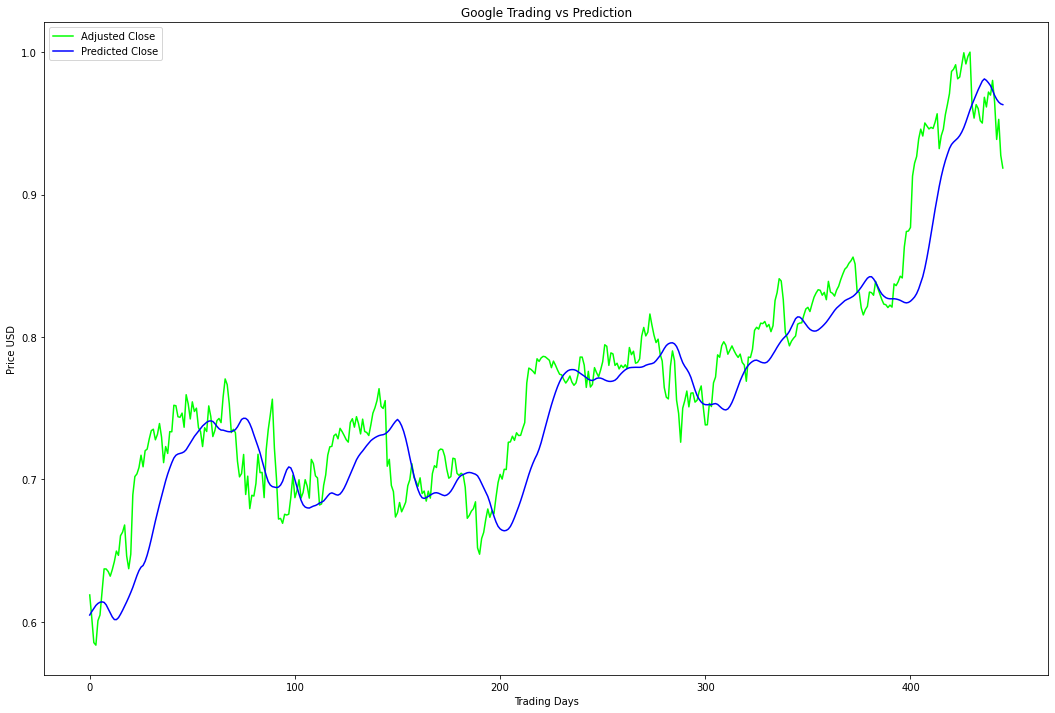

In [26]:
vs.plot_lstm_prediction(y_test,predictions)

In [27]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00034424 MSE (0.01855378 RMSE)
Test Score: 0.00112857 MSE (0.03359423 RMSE)


In [28]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]
true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)   

Delta Price: 0.001129 - RMSE * Adjusted Close Range


In [29]:
import preprocess_data as ppd
data = pd.read_csv('googl.csv')
stocks = ppd.remove_data(data)
stocks = ppd.get_normalised_data(stocks)
stocks = stocks.drop(['Item'], axis = 1)
print(stocks.head())
X = stocks[:].values
Y = stocks[:]['Close'].values
X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]
print(X.shape)
print(Y.shape) 
predictions = model.predict(X)
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
Test Score: 0.3941 MSE (0.6278 RMSE)
